In [4]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df1 = pd.read_csv("C:\\Users\\Hp\\Downloads\\archive\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df2 = df1.drop(["area_type", "availability", "society", "balcony"], axis = "columns")

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.shape

(13320, 5)

In [10]:
df2.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [11]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3 = df2.dropna()

In [13]:
df3.shape

(13246, 5)

In [14]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
# wanna make size all integers and same format
df3['rooms'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))
df3.head()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3['rooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3[df3.rooms>15]

# looks like some are errors e.g. 43 rooms in 2400 sqft 

,location,size,total_sqft,bath,price,rooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [20]:
df3["total_sqft"].unique()
# not all entries are in the same format e.g. there are ranges too like '1133 - 1384'

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
# show rows that are NOT convertable to float

df3[~df3.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
# converts all entries to float and also those in range to floats by taking average

def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2 :
        return(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
# check specific index i.e. index 30 if converted from range to float
df4.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
rooms                 4
Name: 30, dtype: object

In [26]:
# checking if either bath or price columns have any other data type apart from float
df4[~df4.bath.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,rooms


In [27]:
df4[~df4.price.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,rooms


In [28]:
df4.head(10)

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
# gonna find price per sqft, remember price is in lakhs

df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [31]:
len(df5.location.unique())

# thats so many locations

1304

In [32]:
df5.location = df5.location.apply(lambda x : x.strip()) # remove any leading or trailing spaces 
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
print(location_stats)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64


In [33]:
len(location_stats[location_stats<=20])

1150

In [34]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

location
Poorna Pragna Layout    20
Yelachenahalli          20
Binny Pete              20
Sanjay nagar            20
HBR Layout              20
                        ..
LIC Colony               1
Kuvempu Layout           1
Kumbhena Agrahara        1
Kudlu Village,           1
1 Annasandrapalya        1
Name: location, Length: 1150, dtype: int64

In [35]:
df5.location = df5.location.apply(lambda x : "Other" if x in location_stats_less_than_20 else x)
len(df5.location.unique())

144

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
df5 = df5.rename(columns = {'rooms' : 'rooms/hall/kitchen'})
df5.head(10)

,location,size,total_sqft,bath,price,rooms/hall/kitchen,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
df5 = df5.rename(columns = {'rooms/hall/kitchen' : 'rooms\hall\kitchen'})
df5 = df5.rename(columns = {'rooms\hall\kitchen' : 'BedroomHallKitchen'})

# was changing name of column to prevent error from \ / 

df5[df5.total_sqft/df5.BedroomHallKitchen < 300].head(10)

,location,size,total_sqft,bath,price,BedroomHallKitchen,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Other,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,Other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [39]:
df5.shape

(13246, 7)

In [40]:
# drop rows that have outliers in terms of sqft per room
df6 = df5[~(df5.total_sqft/df5.BedroomHallKitchen < 300)]
df6.shape

(12502, 7)

In [41]:
# check if there are extreme cases in prices per sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
# we assume our data is a normal distribution therefore we will filter out points which are beyond mean and standard deviation
# but we will do this per location coz some are expensive neighbourhoods

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10431, 7)

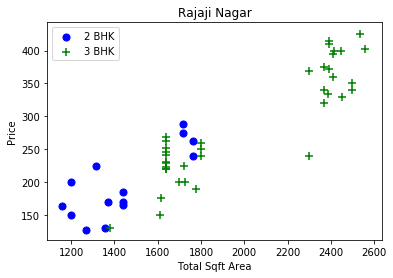

In [43]:
# some prices are high even if same location and has less rooms than another one in same loc

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BedroomHallKitchen==2)]
    bhk3 = df[(df.location==location) & (df.BedroomHallKitchen==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

# will find outliers i.e. less rooms but more expensive 
# didnt do this here but check video if u wanna implement that concept

Text(0, 0.5, 'Count')

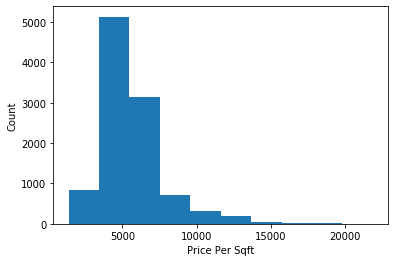

In [44]:
# plot a histogram to check house counts with the price per sqft area
plt.hist(df7.price_per_sqft)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')


In [45]:
# check bath features
df7.bath.unique()

array([ 4.,  3.,  5.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,BedroomHallKitchen,price_per_sqft
5482,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
5625,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6704,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
6877,Other,10 BHK,4000.0,12.0,160.0,10,4000.000000
7216,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

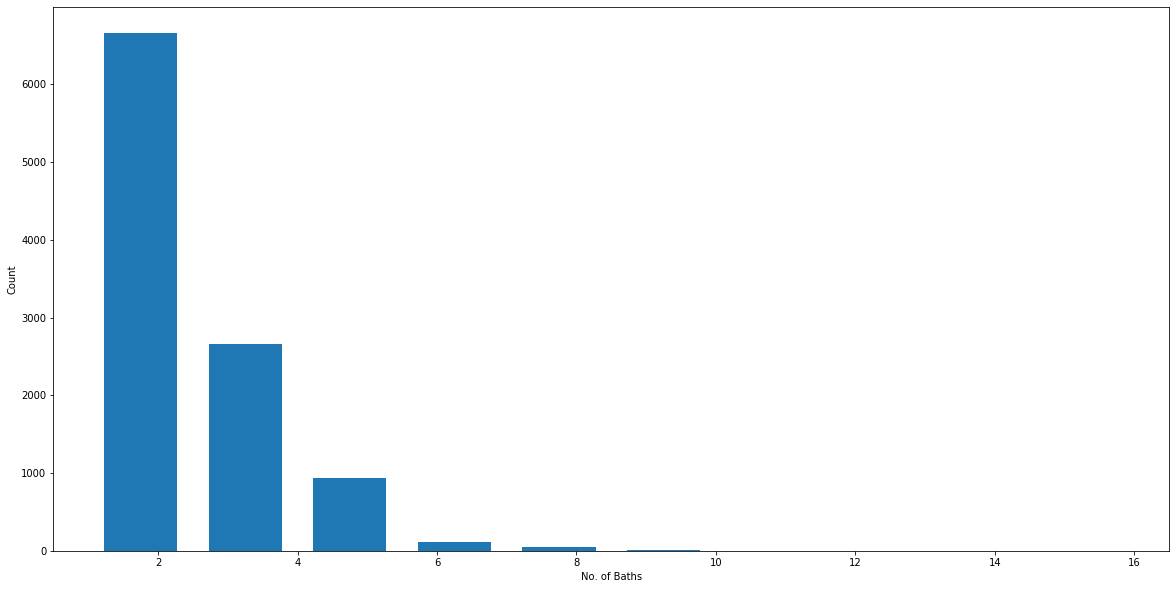

In [53]:
# some dont make sense like 4k sqft with 12 baths and 10 bhk
# we will remove any outliers if baths > bhks with more than 2 i.e. 12 baths and 10 bhks etc will be removed
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.bath, rwidth=0.7)
plt.xlabel('No. of Baths')
plt.ylabel('Count')

In [54]:
df7[df7.bath > df7.BedroomHallKitchen + 2]

,location,size,total_sqft,bath,price,BedroomHallKitchen,price_per_sqft
5360,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6638,Other,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
7577,Other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
9260,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [59]:
df8 = df7[df7.bath < df7.BedroomHallKitchen + 2]
df8.shape

(10335, 7)

In [60]:
# our dataset is ready for ML
# we will first drop unnecessary columns i.e. size and price per sqft,, we used price per sqft for the sake of outlier detection

df9 = df8.drop(["size", "price_per_sqft"], axis='columns')
df9.head(10)

,location,total_sqft,bath,price,BedroomHallKitchen
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
4,1st Phase JP Nagar,2024.0,3.0,157.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2
7,1st Phase JP Nagar,1077.0,2.0,93.0,2
8,1st Phase JP Nagar,1566.0,2.0,180.0,2
9,1st Phase JP Nagar,840.0,2.0,50.0,1


In [62]:
# we first have to change location column to numeric by one hot encoding
dummies = pd.get_dummies(df9.location)
dummies.head(10)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# gonna concat dummies df to our df9
df10 = pd.concat([df9,dummies.drop('Other', axis='columns')], axis='columns')
df10.head(10)

# we drop Other coz if all are 0s we know its Others automatically

,location,total_sqft,bath,price,BedroomHallKitchen,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2024.0,3.0,157.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1566.0,2.0,180.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,840.0,2.0,50.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# drop location col now
df11 = df10.drop('location', axis='columns')
df11.head()

,total_sqft,bath,price,BedroomHallKitchen,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,157.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df11.shape

(10335, 147)

In [67]:
# split to independent and target variables

X = df11.drop('price', axis='columns')
X.head()

,total_sqft,bath,BedroomHallKitchen,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y = df11.price
y.head()

0    250.0
1    167.0
2     85.0
3    210.0
4    157.0
Name: price, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7579904871907404

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.74183792, 0.77857044, 0.72295966, 0.7492893 , 0.74990653])

In [75]:
X.columns

Index(['total_sqft', 'bath', 'BedroomHallKitchen', '1st Phase JP Nagar',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Vidyaranyapura', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=146)

In [76]:
# will return index of specific loc
np.where(X.columns=='Ulsoor')[0][0]

136

In [77]:
# create function to predict price

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [78]:
# lets try and predict, price is in lakhs
predict_price('1st Phase JP Nagar', 1000, 2, 2)

87.04552228020103

In [79]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

88.33644156041385

In [80]:
predict_price('1st Phase JP Nagar', 1500, 2, 2)

122.77117608205243

In [85]:
predict_price('1st Phase JP Nagar', 2830, 4, 4)

220.3832537554029

In [87]:
predict_price('Indira Nagar', 1000, 3, 3)

160.25862042064074

In [88]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [89]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))